## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [4]:
df = pd.read_csv("processed_dataset.csv")

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_worked_at_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Encoding Categorical Columns

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_worked_at_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
categorical_columns = ['Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']
df = pd.get_dummies(df, columns = categorical_columns, drop_first = True)
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_worked_at_company,Work_accident_1,left_1,promotion_last_5years_1,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,False,True,False,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,False,True,False,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,False,True,False,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,False,True,False,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,False,True,False,False,False,False,False,False,False,True,False,False,True,False


## Performing a Stratified Split of Dataset

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('left_1', axis=1)
y = df['left_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

## Upsampling the Training Dataset using the SMOTE Technique

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print("Original Dataset Counter : ", Counter(y_train))
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Random Oversampling Counter : ", Counter(y_train_smote))

Original Dataset Counter :  Counter({False: 9142, True: 2857})
Random Oversampling Counter :  Counter({False: 9142, True: 9142})


## Building a Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.01,0.1,1,10], 'solver' : ['lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid, cv = 5, verbose = 2)
grid.fit(X_train_smote, y_train_smote)
print("Best parameters : ", grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.5s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.3s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.4s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.2s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.3s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.7s
[CV] END ................................C=0.1, s

In [24]:
tuned_model = LogisticRegression(C = 0.01, solver = 'lbfgs', max_iter = 1000)
tuned_model.fit(X_train_smote,y_train_smote)

LogisticRegression(C=0.01, max_iter=1000)

In [26]:
y_pred = tuned_model.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred)

0.7733333333333333

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.92      0.77      0.84      2286
        True       0.52      0.78      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.82      0.77      0.79      3000



In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1760  526]
 [ 154  560]]


### Building a Random Forest Classifier Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
param_grid_rf  = {'n_estimators' : [20,50,75], 'max_depth' : [2,3,5], 'min_samples_split' : [10,15,30], 'min_samples_leaf' : [10,15,20] }
grid_search_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf, cv = 5, verbose = 2)
grid_search_rf.fit(X_train_smote,y_train_smote)
print("Best parameters : ", grid_search_rf.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, min_sam

In [39]:
tuned_rf_model = RandomForestClassifier(n_estimators = 75, max_depth = 5, min_samples_leaf = 10, min_samples_split = 15)
tuned_rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=15,
                       n_estimators=75)

In [41]:
y_pred_rf = tuned_rf_model.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred_rf)

0.9636666666666667

In [45]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98      2286
        True       0.93      0.92      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



##### The above model seems to have overfitted

In [48]:
tuned_rf_generalised_model = RandomForestClassifier(n_estimators = 50, max_depth = 3, min_samples_leaf = 40, min_samples_split = 60, max_features = 2)
tuned_rf_generalised_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=3, max_features=2, min_samples_leaf=40,
                       min_samples_split=60, n_estimators=50)

In [50]:
y_pred_rf_generalised = tuned_rf_generalised_model.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred_rf_generalised)

0.865

In [54]:
print(classification_report(y_test,y_pred_rf_generalised))

              precision    recall  f1-score   support

       False       0.91      0.91      0.91      2286
        True       0.72      0.72      0.72       714

    accuracy                           0.86      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.87      0.86      0.87      3000



### Building a Gradient Boosting Classifier Model

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
adaboost = AdaBoostClassifier(estimator = DecisionTreeClassifier(), random_state=42)

In [67]:
param_grid_ada = {'n_estimators': [25,50,75],'learning_rate': [0.01, 0.1, 1]}
grid_search_ada = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid_ada,
    scoring='accuracy',
    cv=5,
    n_jobs=1,
    verbose=2
)
grid_search_ada.fit(X_train_smote, y_train_smote)
print("Best parameters : ", grid_search_ada.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................learning_rate=0.01, n_estimators=25; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=25; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=25; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=25; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=25; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=75; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=75; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=75; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=75; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=75; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=25; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=25; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=25; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=25; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=25; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adi

[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=75; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=75; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=75; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=75; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=75; total time=   0.0s
[CV] END ...................learning_rate=1, n_estimators=25; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=25; total time=   0.0s
[CV] END ...................learning_rate=1, n_estimators=25; total time=   0.0s
[CV] END ...................learning_rate=1, n_estimators=25; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=25; total time=   0.0s
[CV] END ...................learning_rate=1, n_estimators=50; total time=   0.0s
[CV] END ...................learning_rate=1, n_estimators=50; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=50; total time=   0.0s
[CV] END ...................learning_rate=1, n_estimators=50; total time=   0.0s
[CV] END ...................learning_rate=1, n_estimators=50; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=75; total time=   0.0s
[CV] END ...................learning_rate=1, n_estimators=75; total time=   0.0s
[CV] END ...................learning_rate=1, n_estimators=75; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=75; total time=   0.0s
[CV] END ...................learning_rate=1, n_estimators=75; total time=   0.0s
Best parameters :  {'learning_rate': 0.01, 'n_estimators': 25}


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [69]:
tuned_model_ada = AdaBoostClassifier(estimator = DecisionTreeClassifier(), random_state = 42, learning_rate = 0.01, n_estimators = 25)
tuned_model_ada.fit(X_train_smote,y_train_smote)

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.01,
                   n_estimators=25, random_state=42)

In [73]:
y_pred_ada = tuned_model_ada.predict(X_test)

In [75]:
print(accuracy_score(y_test,y_pred_ada))

0.973


In [77]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      2286
        True       0.92      0.97      0.94       714

    accuracy                           0.97      3000
   macro avg       0.95      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000



## Evaluation of Models

### ROC/AUC Curves for the Models

In [81]:
from sklearn.metrics import roc_curve, auc

#### Linear Regression

In [90]:
fpr_linear, tpr_linear, thresholds_linear = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_linear,tpr_linear)

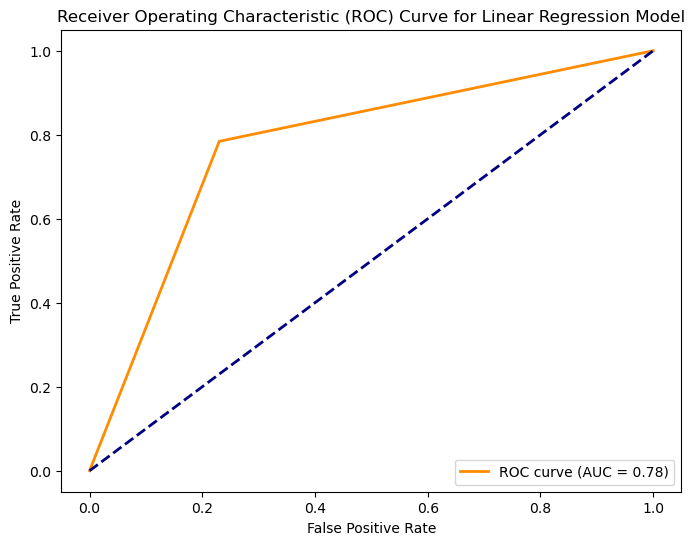

In [94]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Linear Regression Model')
plt.legend(loc="lower right")
plt.show()